In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2_contingency
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

In [31]:
df = pd.read_csv('/content/creditcard.csv')

In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
df.shape

(284807, 31)

In [37]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [36]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [40]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Categorical variables: []


In [41]:
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 0
Number of numerical variables: 31


In [43]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


In [44]:
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.shape

(283726, 31)

<ipython-input-47-8a0092290889>:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-8a0092290889>:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-8a0092290889>:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

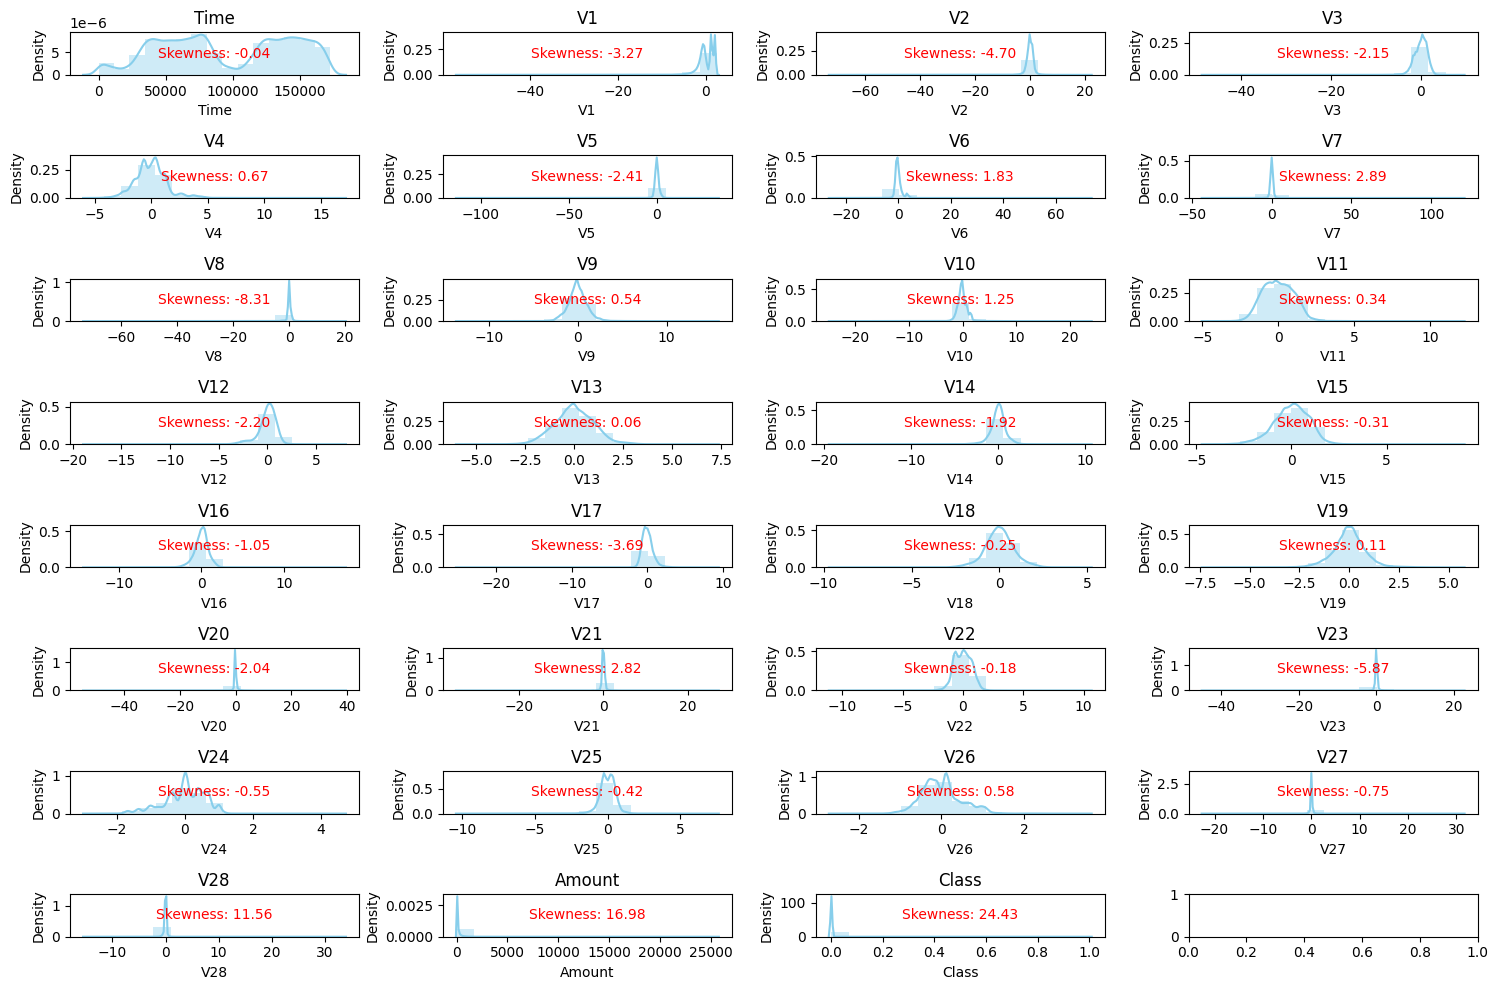

Skewness:
Time      -0.035581
V1        -3.273271
V2        -4.695162
V3        -2.151984
V4         0.671504
V5        -2.414079
V6         1.829880
V7         2.890271
V8        -8.310970
V9         0.537663
V10        1.252967
V11        0.344074
V12       -2.199008
V13        0.064293
V14       -1.918804
V15       -0.309659
V16       -1.051161
V17       -3.690497
V18       -0.248661
V19        0.108312
V20       -2.043121
V21        2.820033
V22       -0.182330
V23       -5.867221
V24       -0.552129
V25       -0.415744
V26        0.580292
V27       -0.753804
V28       11.555115
Amount    16.978803
Class     24.430545
dtype: float64


In [47]:
# Calculate skewness for numerical columns
skewness = df.select_dtypes(include=['int64', 'float64']).skew()

# Count the number of numerical columns
num_cols_count = len(df.select_dtypes(include=['int64', 'float64']).columns)

# Determine the layout for subplots
num_rows = (num_cols_count + 3) // 4  # Adjust the number of columns in each row
num_cols = min(4, num_cols_count)  # Maximum of 4 columns in each row

# Plot histograms for numerical columns to visualize distributions and identify anomalies
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_rows):
    for j in range(num_cols):
        col_idx = i * num_cols + j
        if col_idx < num_cols_count:
            col = df.select_dtypes(include=['int64', 'float64']).columns[col_idx]
            sns.distplot(df[col], bins=15, color='skyblue', ax=axes[i, j])
            axes[i, j].set_title(f'{col}')
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel('Density')

            # Compute skewness
            skew_val = skewness[col]

            # Plot skewness value in the center of plot
            axes[i, j].text(0.5, 0.5, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                            verticalalignment='center', transform=axes[i, j].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print skewness values
print("Skewness:")
print(skewness)

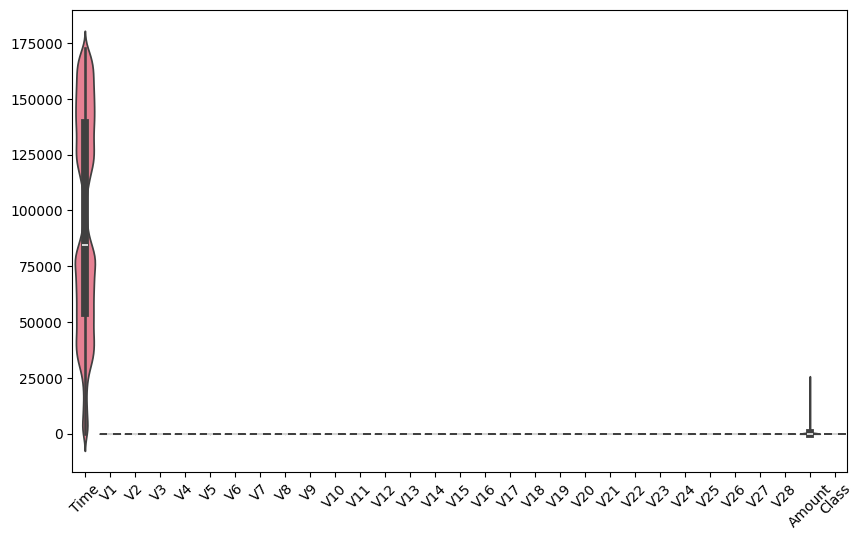

In [48]:
# Plot the violin plot with rotated text labels
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, orient='v')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

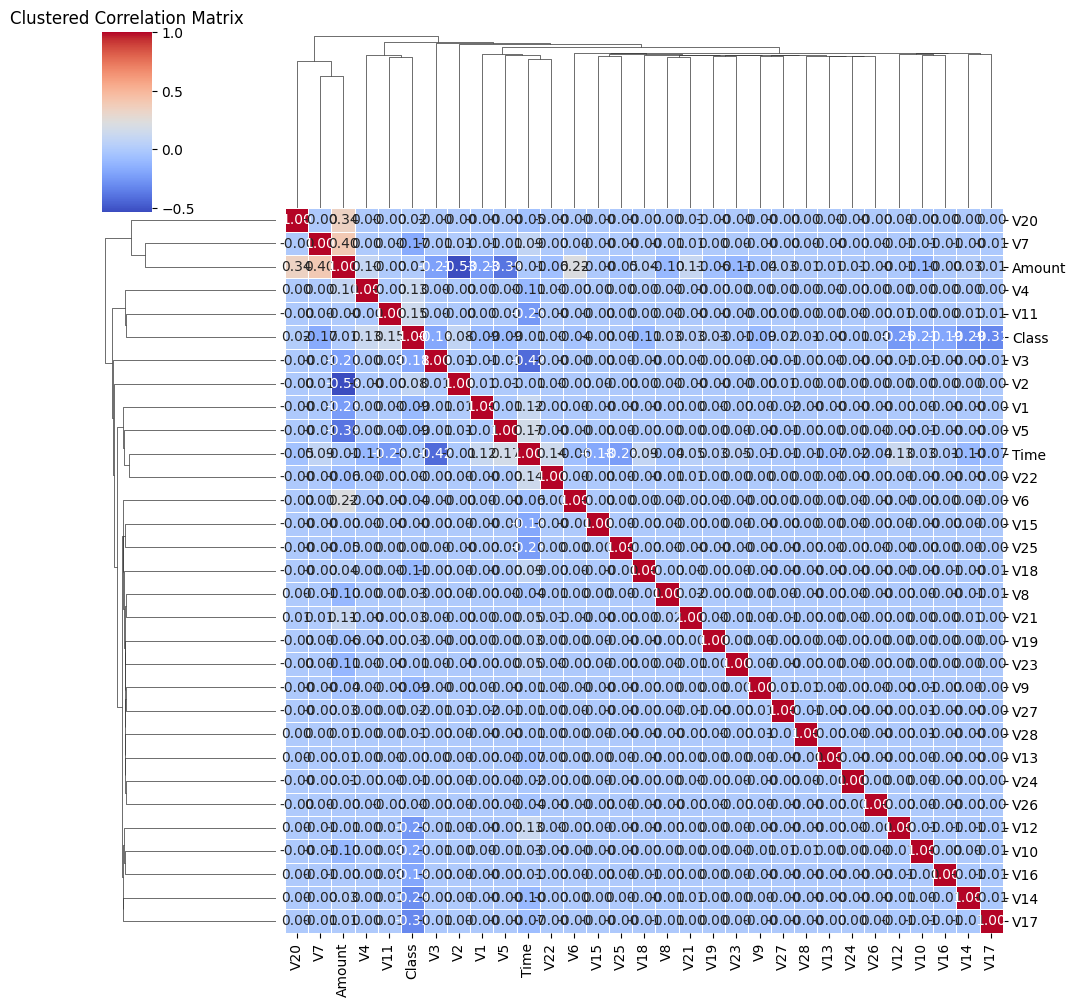

In [49]:
# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a clustered heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Clustered Correlation Matrix')

# Show the plot
plt.show()

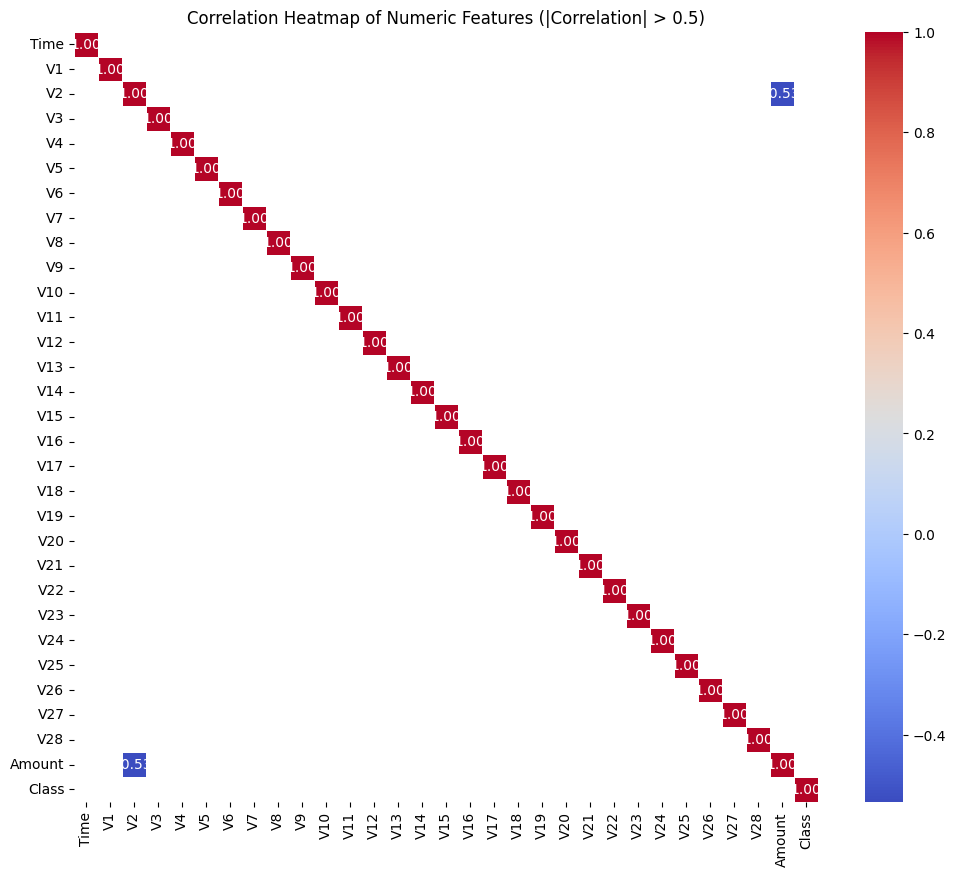

In [53]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Filter correlation matrix to include values greater than 0.5 or less than -0.5
corr_matrix_filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot the heatmap with filtered correlation values
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features (|Correlation| > 0.5)')
plt.show()

In [54]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


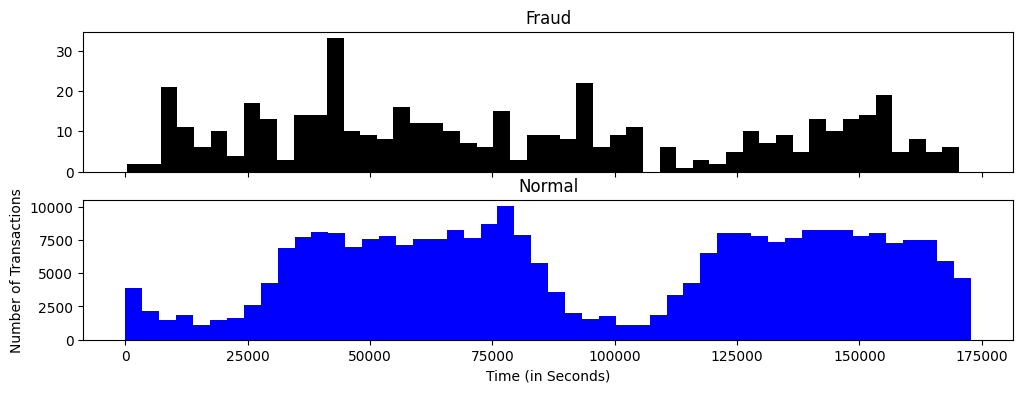

In [58]:
# Create subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

# Set number of bins
bins = 50

# Plot histogram for Fraud transactions (Class == 1) with red color
ax1.hist(df.Time[df.Class == 1], bins=bins, color='black')
ax1.set_title('Fraud')

# Plot histogram for Normal transactions (Class == 0) with red color
ax2.hist(df.Time[df.Class == 0], bins=bins, color='blue')
ax2.set_title('Normal')

# Set labels for the entire plot
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')

# Display the plot
plt.show()

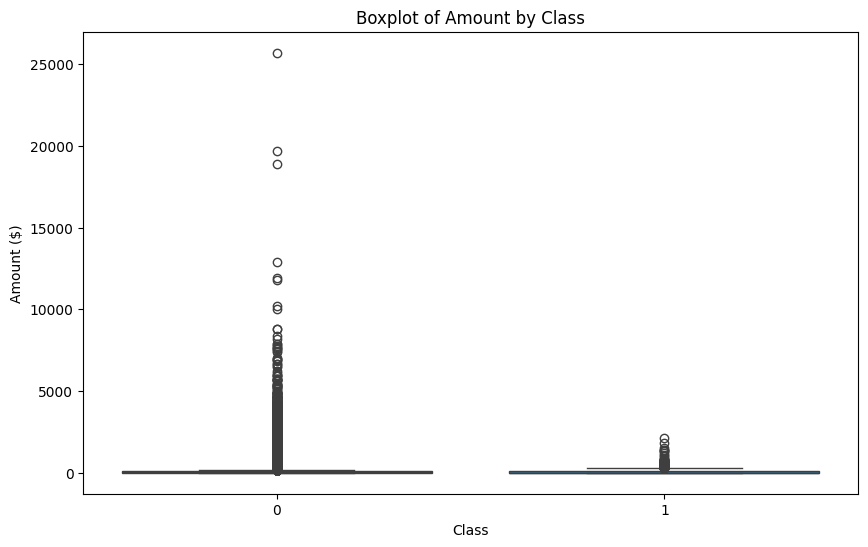

In [61]:
# Create subplots
f, ax = plt.subplots(figsize=(10, 6))

# Plot boxplot for the Amount feature by Class
sns.boxplot(x="Class", y="Amount", data=df, ax=ax)
ax.set_title('Boxplot of Amount by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Amount ($)')

# Show the plot
plt.show()

In [62]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0

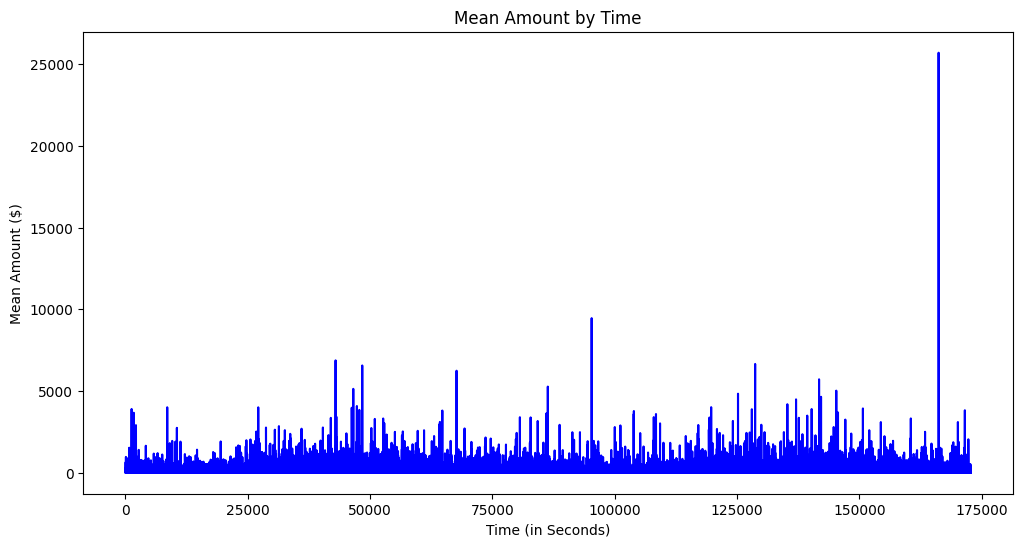

In [63]:
# Group by Time and calculate the mean Amount for each time point
mean_amount_by_time = df.groupby('Time')['Amount'].mean()

# Create subplots
plt.figure(figsize=(12, 6))

# Plot line plot for the mean Amount by Time
plt.plot(mean_amount_by_time.index, mean_amount_by_time.values, color='blue')
plt.title('Mean Amount by Time')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Mean Amount ($)')

# Display the plot
plt.show()

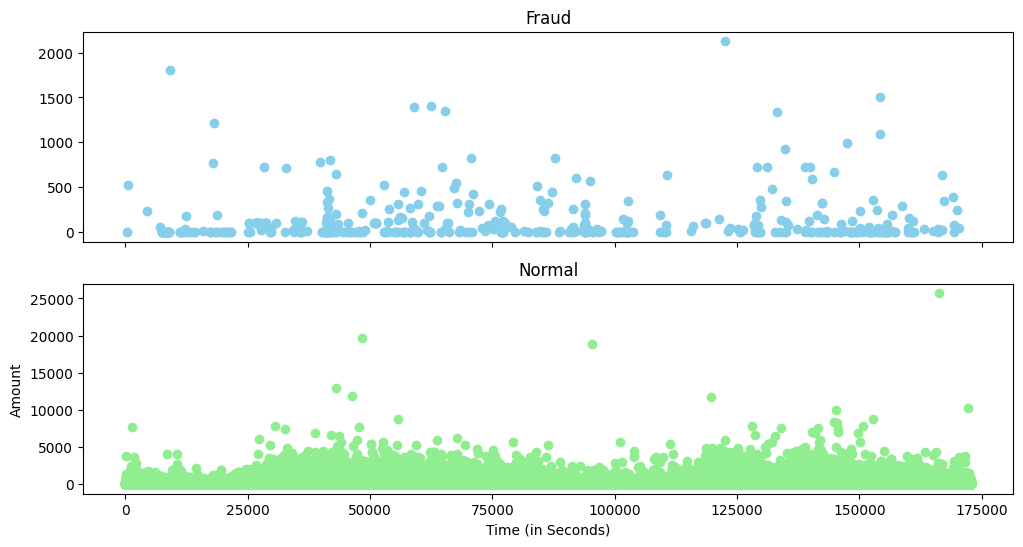

In [64]:
# Create subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

# Plot scatter plot for Fraud transactions (Class == 1) with red color
ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1], color='skyblue')
ax1.set_title('Fraud')

# Plot scatter plot for Normal transactions (Class == 0) with green color
ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0], color='lightgreen')
ax2.set_title('Normal')

# Set labels for the entire plot
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

# Display the plot
plt.show()

In [66]:
# Select only the anonymized features
v_features = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]

# Display the selected features
print(v_features.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')


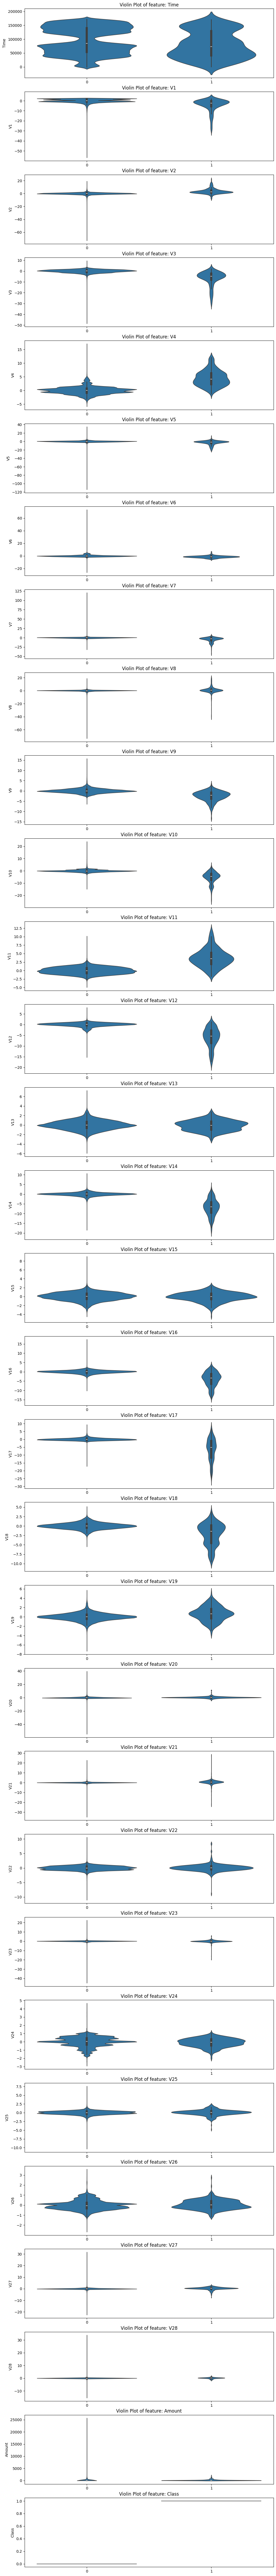

In [69]:
# Define the features to visualize
v_features = df.iloc[:, :-1]

# Determine the number of features
num_features = len(v_features.columns)

# Create subplots
plt.figure(figsize=(12, 4*num_features))
gs = plt.GridSpec(num_features, 1)

for i, cn in enumerate(v_features.columns):
    ax = plt.subplot(gs[i])
    sns.violinplot(x=df['Class'], y=df[cn], ax=ax)
    ax.set_xlabel('')
    ax.set_title('Violin Plot of feature: ' + str(cn))

plt.show()

In [70]:
#Drop all of the features that have very similar distributions
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [71]:
df['V1_'] = df.V1.map(lambda x: 1 if x < -3 else 0)
df['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
df['V21_'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

In [72]:
#Create a new feature for normal (non-fraudulent) transactions.
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [73]:
#Rename 'Class' to 'Fraud'.
df = df.rename(columns={'Class': 'Fraud'})

In [74]:
# Print counts of 'Normal' transactions
print("Normal transactions:")
print(df['Normal'].value_counts())
print()

# Print counts of 'Fraud' transactions
print("Fraudulent transactions:")
print(df['Fraud'].value_counts())
print()

# Calculate the total number of transactions
total_transactions = len(df)

# Calculate the counts of 'Normal' and 'Fraud' transactions
normal_counts = df['Normal'].value_counts().get(1, 0)
fraud_counts = df['Fraud'].value_counts().get(1, 0)

# Calculate the percentages
normal_percentage = (normal_counts / total_transactions) * 100
fraud_percentage = (fraud_counts / total_transactions) * 100

# Print the counts and percentages
print("Normal transactions count:", normal_counts, ", Percentage:", round(normal_percentage, 2), "%")
print("Fraudulent transactions count:", fraud_counts, ", Percentage:", round(fraud_percentage, 2), "%")

Normal transactions:
Normal
1.0    283253
0.0       473
Name: count, dtype: int64

Fraudulent transactions:
Fraud
0    283253
1       473
Name: count, dtype: int64

Normal transactions count: 283253 , Percentage: 99.83 %
Fraudulent transactions count: 473 , Percentage: 0.17 %


In [75]:
#Fraud and Normal transactions.
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

In [76]:
# Set X_train equal to 80% of the fraudulent transactions.
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

# Add 80% of the normal transactions to X_train.
X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)]

In [77]:
from sklearn.utils import shuffle

# Shuffle the DataFrames
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [78]:
#Add target features to y_train and y_test.
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [79]:
#Drop target features from X_train and X_test.
X_train = X_train.drop(['Fraud','Normal'], axis = 1)
X_test = X_test.drop(['Fraud','Normal'], axis = 1)

In [81]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

226980
226980
56746
56746


In [82]:
ratio = len(X_train)/count_Frauds

y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [83]:
features = X_train.columns.values
for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

In [84]:
split = int(len(y_test)/2)

inputX = X_train.values
inputY = y_train.values
inputX_valid = X_test.values[:split]
inputY_valid = y_test.values[:split]
inputX_test = X_test.values[split:]
inputY_test = y_test.values[split:]

In [87]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Number of input nodes.
input_nodes = 37

# Multiplier maintains a fixed ratio of nodes between each layer.
multiplier = 1.5

# Number of nodes in each hidden layer
hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1 * multiplier)
hidden_nodes3 = round(hidden_nodes2 * multiplier)

# Placeholder for dropout
pkeep = tf.placeholder(tf.float32)

In [90]:
x = tf.placeholder(tf.float32, [None, input_nodes])

# layer 1
a1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, a1) + b1)

# layer 2
a2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, a2) + b2)

# layer 3
a3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.15))
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, a3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

# layer 4
a4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.15))
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, a4) + b4)

# output
y = y4
y_ = tf.placeholder(tf.float32, [None, 2])

In [91]:
# Parameters
training_epochs = 5 # should be 2000, it will timeout when uploading
training_dropout = 0.9
display_step = 1 # 10
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.005

In [92]:
# Cost function: Cross Entropy
cost = -tf.reduce_sum(y_ * tf.log(y))

# We will optimize our model via AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Correct prediction if the most likely value (Fraud or Normal) from softmax equals the target value.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [93]:
accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
valid_accuracy_summary = []
valid_cost_summary = []
stop_early = 0 # To keep track of the number of epochs before early stopping


saver = tf.train.Saver(max_to_keep=1)

# Initialize variables and tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(training_epochs):
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([optimizer], feed_dict={x: batch_x,
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX,
                                                                            y_: inputY,
                                                                            pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: inputX_valid,
                                                                                  y_: inputY_valid,
                                                                                  pkeep: 1})

            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy),
                   "Cost =", "{:.5f}".format(newCost),
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy),
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))

            
            # Record the results of the model
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)

            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0

    print()
    print("Optimization Finished!")
    print()



Epoch: 0 Acc = 0.98496 Cost = 79301.21094 Valid_Acc = 0.98449 Valid_Cost =  10755.74707
Epoch: 1 Acc = 0.97886 Cost = 67357.38281 Valid_Acc = 0.97952 Valid_Cost =  9024.18945
Epoch: 2 Acc = 0.98424 Cost = 66119.75781 Valid_Acc = 0.98492 Valid_Cost =  9255.25586
Epoch: 3 Acc = 0.98352 Cost = 63837.27344 Valid_Acc = 0.98396 Valid_Cost =  9293.63477
Epoch: 4 Acc = 0.98205 Cost = 59578.33203 Valid_Acc = 0.98234 Valid_Cost =  9172.75391

Optimization Finished!



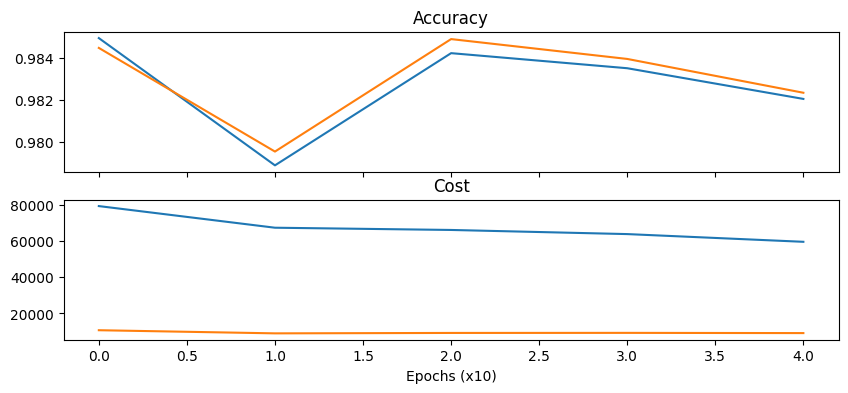

In [95]:
# Plot the accuracy and cost summaries
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary)
ax1.plot(valid_accuracy_summary)
ax1.set_title('Accuracy')

ax2.plot(cost_summary)
ax2.plot(valid_cost_summary)
ax2.set_title('Cost')

plt.xlabel('Epochs (x10)')
plt.show()